In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D,Dropout,Input,Activation,BatchNormalization,SimpleRNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from numpy import unique
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer
from sklearn.model_selection import GridSearchCV
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
from imblearn.over_sampling import SMOTE

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D

from keras.models import Model
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.layers import Dense,GRU, Conv1D, Flatten,LSTM, MaxPooling1D,Dropout,Input,Activation,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from numpy import unique
from keras.layers import Dense, Conv2D, MaxPool1D, Flatten, Dropout # importing dense layer
from sklearn import preprocessing
from keras.layers.embeddings import Embedding
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer


In [15]:
dataset = pd.read_csv('../input/rainfall-prediction/dataset1.csv')

In [16]:
dataset

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


In [17]:
 dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [18]:
# remove attribute 'day'
dataset.drop(['day'],axis=1,inplace=True)
dataset.shape

(366, 11)

In [19]:
dataset['rainfall'].value_counts()

yes    249
no     117
Name: rainfall, dtype: int64

In [20]:
multi_label = pd.DataFrame(dataset.rainfall)
le = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le.fit_transform)
dataset['rainfall'] = enc_label
dataset

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...
361,1022.7,18.8,17.7,16.9,15.0,84,90,1,0.0,30.0,18.4
362,1026.6,18.6,17.3,16.3,12.8,75,85,1,1.0,20.0,25.9
363,1025.9,18.9,17.7,16.4,13.3,75,78,1,4.6,70.0,33.4
364,1025.3,19.2,17.3,15.2,13.3,78,86,1,1.2,20.0,20.9


In [21]:
y_train= dataset[['rainfall']]
X_train= dataset.drop(labels=['rainfall'], axis=1)

print('X_train has shape:',X_train.shape,'\ny_train has shape:',y_train.shape)

X_train has shape: (366, 10) 
y_train has shape: (366, 1)


In [22]:
#y=y_train
#x=X_train

In [23]:
#X, y = make_classification(n_samples=366, n_features=2, n_redundant=0,
#	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

In [24]:
y_train

,rainfall
0,1
1,1
2,1
3,1
4,1
...,...
361,1
362,1
363,1
364,1


In [25]:
np.any(np.isnan(y_train))


False

In [26]:
counter = Counter(y)
print(counter)

NameError: name 'y' is not defined

In [27]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [28]:
x=X_train
y=y_train

In [29]:
y=np.array(y, dtype=np.int64)
x=np.array(x, dtype=np.int64)

In [30]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [31]:
counter = Counter(y)
print(counter)

Counter({1: 249, 0: 249})


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=42)


In [33]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

In [34]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(292, 10, 1)

In [35]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(74, 10, 1)

In [36]:
 dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pressure                366 non-null    float64
 1   maxtemp                 366 non-null    float64
 2   temparature             366 non-null    float64
 3   mintemp                 366 non-null    float64
 4   dewpoint                366 non-null    float64
 5   humidity                366 non-null    int64  
 6   cloud                   366 non-null    int64  
 7   rainfall                366 non-null    int64  
 8   sunshine                366 non-null    float64
 9            winddirection  365 non-null    float64
 10  windspeed               365 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 31.6 KB


In [37]:
    model = Sequential()
    model.add(Conv1D(16, 3, padding="same",input_shape = (X_train.shape[1], 1), activation='relu'))
#nn.add(MaxPooling1D(pool_size=(2)))
#cnn.add(Flatten())
#model = Sequential()
#model.add(TimeDistributed(cnn, ...))
   # model.add(Dropout(0.2))

    model.add(LSTM(32,input_shape = (X_train.shape[1], 1)))
    model.add(Dropout(0.2))
#    model.add(BatchNormalization())

# Third LSTM layer
   #model.add(Dense(10))
    model.add(BatchNormalization())

    model.add(Dropout(0.2))
   # model.add(BatchNormalization())
    model.add(Dense(16))
    model.add(Dropout(0.2))



    model.add(Dense(units= 1,activation='sigmoid' ))

    #model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
    model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics=['accuracy'])


2022-10-31 13:36:50.307288: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 13:36:50.308364: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 13:36:50.752478: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 13:36:50.753410: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 13:36:50.754361: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [38]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
#model= model.compile(loss="binary_crossentropy", metrics=['accuracy'])
#model = KerasClassifier(create_model, verbose=0, )


In [39]:
from keras.callbacks import EarlyStopping
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')


In [40]:
# training the model on training dataset
history = model.fit(X_train, y_train, epochs=100, batch_size=10,
                    callbacks=[early],
validation_split=0.2)


2022-10-31 13:36:56.900343: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-10-31 13:37:01.108356: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


24/24 [==============================] - 17s 25ms/step - loss: 0.8407 - accuracy: 0.5279 - val_loss: nan - val_accuracy: 0.7627
Epoch 2/100
24/24 [==============================] - 0s 6ms/step - loss: 0.7020 - accuracy: 0.6052 - val_loss: nan - val_accuracy: 0.7458
Epoch 3/100
24/24 [==============================] - 0s 6ms/step - loss: 0.7303 - accuracy: 0.6009 - val_loss: nan - val_accuracy: 0.7458
Epoch 4/100
24/24 [==============================] - 0s 6ms/step - loss: 0.5984 - accuracy: 0.6910 - val_loss: nan - val_accuracy: 0.7458
Epoch 5/100
24/24 [==============================] - 0s 7ms/step - loss: 0.6561 - accuracy: 0.6738 - val_loss: nan - val_accuracy: 0.7458
Epoch 6/100
24/24 [==============================] - 0s 6ms/step - loss: 0.6226 - accuracy: 0.6910 - val_loss: nan - val_accuracy: 0.7458
Epoch 7/100
24/24 [==============================] - 0s 6ms/step - loss: 0.6301 - accuracy: 0.6695 - val_loss: nan - val_accuracy: 0.7458
Epoch 8/100
24/24 [=========================

In [41]:
#seed = 7
#tf.random.set_seed(seed)
#model = KerasClassifier(model=model, verbose=0)
#batch_size = [10, 20, 40, 60, 80, 100]
#epochs = [10, 50, 100]
#param_grid = dict(batch_size=batch_size, epochs=epochs)
#grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
#grid_result = grid.fit(X_train, y_train)

In [42]:
#rom tensorflow.keras.wrappers.scikit_learn import KerasClassifier
#odel = KerasClassifier(model=model, verbose=0)

In [43]:
#SelectedParameters = {
#"batch_size":[10, 20, 40, 60, 80, 100],
#"epochs": [10, 50, 100],
#"optimizer" : ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'],
#"learn_rate": [0.001, 0.01, 0.1, 0.2, 0.3],
#"momentum": [0.0, 0.2, 0.4, 0.6, 0.8, 0.9],
#"init_mode" :['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'],
#"activation" : ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'],
#"weight_constraint" : [1.0, 2.0, 3.0, 4.0, 5.0],
#"dropout_rate" : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
#"neurons" : [1, 5, 10, 15, 20, 25, 30],
  
                     
                #     }

In [44]:

#grid = GridSearchCV(model,SelectedParameters, cv = 2,return_train_score=True)
#grid_result = grid.fit(X_train, y_train)
 
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
    #print("%f (%f) with: %r" % (mean, stdev, param))
    
 

In [45]:
# defining loss function, optimizer, metrics and then compiling model
#model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [46]:
# summary of model layers
#model.summary()

In [47]:
# predicting target attribute on testing dataset
#score =model.evaluate(X_test, y_test, verbose=1)
#print("Test loss:", score[0])
#print("Test accuracy:", score[1])
  

Text(0, 0.5, 'Loss')

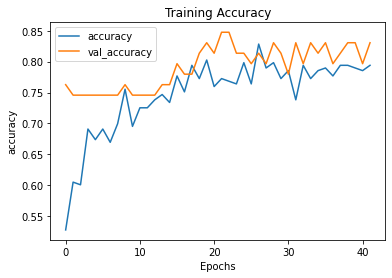

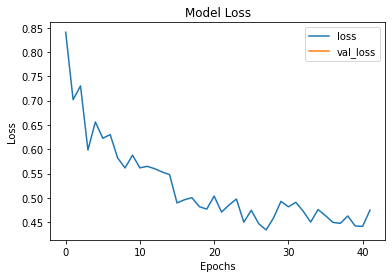

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)

pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot()
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")

pd.DataFrame(history.history)[["loss", "val_loss"]].plot()
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")